In [112]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import platform

if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    plt.rc('font', family='AppleGothic')
else: #linux
    plt.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
plt.rcParams['axes.unicode_minus'] = False


In [113]:
df = pd.read_csv('police_1.csv', encoding='cp949', index_col=["죄종별", "항목", "2018 년","2019 년","2020 년","2021 년", "2022 년" ])

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4190 entries, ('총계', '발생건수[건]', '1580751', '1611906', '1587866', '1429826', '1482433') to ('기타', '법인체[개]', '1546', '2081', '2054', '1539', '1792')
Empty DataFrame


In [115]:
df.head(8)
# 죄종별로 항목이 8개 지정

Empty DataFrame
Columns: []
Index: [(총계, 발생건수[건], 1580751, 1611906, 1587866, 1429826, 1482433), (총계, 검거건수[건], 1328609, 1342854, 1289129, 1136665, 1133788), (총계, 발생건수 대비 검거건수[%], 84, 83.3, 81.2, 79.5, 76.5), (총계, 검거인원[명], 1728602, 1749015, 1684367, 1360405, 1357038), (총계, 남자검거인원[명], 1286156, 1273899, 1212094, 1002380, 1010855), (총계, 여자검거인원[명], 329007, 347112, 329160, 278825, 278604), (총계, 불상검거인원[명], 113439, 128004, 143113, 79200, 67579), (총계, 법인체[개], 12302, 12620, 11983, 10317, 11610)]

In [116]:
df

Empty DataFrame
Columns: []
Index: [(총계, 발생건수[건], 1580751, 1611906, 1587866, 1429826, 1482433), (총계, 검거건수[건], 1328609, 1342854, 1289129, 1136665, 1133788), (총계, 발생건수 대비 검거건수[%], 84, 83.3, 81.2, 79.5, 76.5), (총계, 검거인원[명], 1728602, 1749015, 1684367, 1360405, 1357038), (총계, 남자검거인원[명], 1286156, 1273899, 1212094, 1002380, 1010855), (총계, 여자검거인원[명], 329007, 347112, 329160, 278825, 278604), (총계, 불상검거인원[명], 113439, 128004, 143113, 79200, 67579), (총계, 법인체[개], 12302, 12620, 11983, 10317, 11610), (강력범죄, 발생건수[건], 26787, 26476, 24332, 22476, 24954), (강력범죄, 검거건수[건], 25811, 25507, 23556, 21294, 23521), (강력범죄, 발생건수 대비 검거건수[%], 96.4, 96.3, 96.8, 94.7, 94.3), (강력범죄, 검거인원[명], 28859, 29462, 27491, 23305, 25420), (강력범죄, 남자검거인원[명], 27339, 27833, 25862, 22074, 24109), (강력범죄, 여자검거인원[명], 1196, 1333, 1359, 1095, 1117), (강력범죄, 불상검거인원[명], 324, 296, 270, 136, 194), (강력범죄, 법인체[개], -, 2, 3, 1, -), (살인기수, 발생건수[건], 309, 297, 308, 270, 275), (살인기수, 검거건수[건], 298, 299, 299, 261, 265), (살인기수, 발생건수 대비 검거건수[%], 96.4, 100.7, 97.1, 96.7, 96.4), (살인기수, 검거인원[명], 358, 362, 349, 321, 308), (살인기수, 남자검거인원[명], 289, 265, 258, 234, 222), (살인기수, 여자검거인원[명], 67, 82, 85, 83, 77), (살인기수, 불상검거인원[명], 2, 15, 6, 4, 9), (살인기수, 법인체[개], -, -, -, 1, -), (살인, 발생건수[건], 226, 225, 252, 204, 207), (살인, 검거건수[건], 217, 226, 245, 196, 197), (살인, 발생건수 대비 검거건수[%], 96, 100.4, 97.2, 96.1, 95.2), (살인, 검거인원[명], 269, 257, 284, 245, 218), (살인, 남자검거인원[명], 218, 206, 213, 187, 170), (살인, 여자검거인원[명], 49, 48, 65, 54, 39), (살인, 불상검거인원[명], 2, 3, 6, 4, 9), (살인, 법인체[개], -, -, -, 1, -), (영아살해, 발생건수[건], 7, 7, 5, 5, 6), (영아살해, 검거건수[건], 7, 7, 5, 5, 6), (영아살해, 발생건수 대비 검거건수[%], 100, 100, 100, 100, 100), (영아살해, 검거인원[명], 6, 7, 6, 5, 10), (영아살해, 남자검거인원[명], -, -, 1, -, 2), (영아살해, 여자검거인원[명], 6, 7, 5, 5, 8), (영아살해, 불상검거인원[명], -, -, -, -, -), (영아살해, 법인체[개], -, -, -, -, -), (존속살해, 발생건수[건], 44, 35, 28, 26, 32), (존속살해, 검거건수[건], 43, 36, 27, 27, 31), (존속살해, 발생건수 대비 검거건수[%], 97.7, 102.9, 96.4, 103.8, 96.9), (존속살해, 검거인원[명], 46, 45, 35, 27, 46), (존속살해, 남자검거인원[명], 43, 28, 27, 24, 32), (존속살해, 여자검거인원[명], 3, 10, 8, 3, 14), (존속살해, 불상검거인원[명], -, 7, -, -, -), (존속살해, 법인체[개], -, -, -, -, -), (촉탁·승낙살인, 발생건수[건], 1, 1, 1, 2, 2), (촉탁·승낙살인, 검거건수[건], 1, 1, 1, 1, 2), (촉탁·승낙살인, 발생건수 대비 검거건수[%], 100, 100, 100, 50, 100), (촉탁·승낙살인, 검거인원[명], 1, 1, 1, 9, 2), (촉탁·승낙살인, 남자검거인원[명], 1, 1, 1, 5, 2), (촉탁·승낙살인, 여자검거인원[명], -, -, -, 4, -), (촉탁·승낙살인, 불상검거인원[명], -, -, -, -, -), (촉탁·승낙살인, 법인체[개], -, -, -, -, -), (자살교사·방조, 발생건수[건], 30, 26, 19, 25, 18), (자살교사·방조, 검거건수[건], 29, 26, 18, 24, 19), (자살교사·방조, 발생건수 대비 검거건수[%], 96.7, 100, 94.7, 96, 105.6), (자살교사·방조, 검거인원[명], 35, 47, 20, 26, 21), (자살교사·방조, 남자검거인원[명], 26, 26, 13, 12, 11), (자살교사·방조, 여자검거인원[명], 9, 16, 7, 14, 10), (자살교사·방조, 불상검거인원[명], -, 5, -, -, -), (자살교사·방조, 법인체[개], -, -, -, -, -), (위계·위력·촉탁·승낙살인, 발생건수[건], -, 1, -, -, -), (위계·위력·촉탁·승낙살인, 검거건수[건], -, 1, -, -, -), (위계·위력·촉탁·승낙살인, 발생건수 대비 검거건수[%], -, 100, -, -, -), (위계·위력·촉탁·승낙살인, 검거인원[명], -, 1, -, -, -), (위계·위력·촉탁·승낙살인, 남자검거인원[명], -, -, -, -, -), (위계·위력·촉탁·승낙살인, 여자검거인원[명], -, 1, -, -, -), (위계·위력·촉탁·승낙살인, 불상검거인원[명], -, -, -, -, -), (위계·위력·촉탁·승낙살인, 법인체[개], -, -, -, -, -), (특가법(보복살인등), 발생건수[건], 1, 2, 3, 3, 3), (특가법(보복살인등), 검거건수[건], 1, 2, 3, 3, 3), (특가법(보복살인등), 발생건수 대비 검거건수[%], 100, 100, 100, 100, 100), (특가법(보복살인등), 검거인원[명], 1, 4, 3, 4, 3), (특가법(보복살인등), 남자검거인원[명], 1, 4, 3, 4, 3), (특가법(보복살인등), 여자검거인원[명], -, -, -, -, -), (특가법(보복살인등), 불상검거인원[명], -, -, -, -, -), (특가법(보복살인등), 법인체[개], -, -, -, -, -), (아동학대처벌법(아동학대살해), 발생건수[건], nan, nan, nan, 5, 7), (아동학대처벌법(아동학대살해), 검거건수[건], nan, nan, nan, 5, 7), (아동학대처벌법(아동학대살해), 발생건수 대비 검거건수[%], nan, nan, nan, 100, 100), (아동학대처벌법(아동학대살해), 검거인원[명], nan, nan, nan, 5, 8), (아동학대처벌법(아동학대살해), 남자검거인원[명], nan, nan, nan, 2, 2), (아동학대처벌법(아동학대살해), 여자검거인원[명], nan, nan, nan, 3, 6), (아동학대처벌법(아동학대살해), 불상검거인원[명], nan, nan, nan, -, -), (아동학대처벌법(아동학대살해), 법인체[개], nan, nan, nan, -, -), (살인미수등, 발생건수[건], 488, 482, 416, 388, 427), (살인미수등, 검거건수[건], 484, 481, 406, 380, 416), (살인미수등, 발생건수 대비 검거건수[%], 99.2, 99.8, 97.6, 97.9, 97.4), (살인미수등, 검거인원[명], 525, 534, 472, 421, 4

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4190 entries, ('총계', '발생건수[건]', '1580751', '1611906', '1587866', '1429826', '1482433') to ('기타', '법인체[개]', '1546', '2081', '2054', '1539', '1792')
Empty DataFrame


In [118]:
len(df)

4190

In [119]:
df.isnull().sum()

Series([], dtype: float64)

In [120]:
print(df.columns)

Index([], dtype='object')


In [121]:
# 죄종별 중 '사기', '전자금융거래법위반', '횡령', '도박범죄' 4개 사용

df.loc['총계']

,,,,,
항목,2018 년,2019 년,2020 년,2021 년,2022 년
발생건수[건],1580751,1611906,1587866,1429826,1482433
검거건수[건],1328609,1342854,1289129,1136665,1133788
발생건수 대비 검거건수[%],84,83.3,81.2,79.5,76.5
검거인원[명],1728602,1749015,1684367,1360405,1357038
남자검거인원[명],1286156,1273899,1212094,1002380,1010855
여자검거인원[명],329007,347112,329160,278825,278604
불상검거인원[명],113439,128004,143113,79200,67579
법인체[개],12302,12620,11983,10317,11610


In [122]:
df.loc['사기']

,,,,,
항목,2018 년,2019 년,2020 년,2021 년,2022 년
발생건수[건],270029,304472,347675,294075,325848
검거건수[건],202300,225121,237407,180418,191900
발생건수 대비 검거건수[%],74.9,73.9,68.3,61.4,58.9
검거인원[명],315627,349329,369317,231204,224977
남자검거인원[명],189100,201152,209019,140397,147301
여자검거인원[명],56091,61483,60870,40778,42925
불상검거인원[명],70436,86694,99428,50029,34751
법인체[개],660,708,678,325,330
검거건수[건],194686,216737,227379,170980,181577


In [123]:
df.loc['전자금융거래법위반']

,,,,,
항목,2018 년,2019 년,2020 년,2021 년,2022 년
발생건수[건],7877,8132,6402,7024,9731
검거건수[건],7720,8151,6301,6637,9245
발생건수 대비 검거건수[%],98,100.2,98.4,94.5,95
검거인원[명],24462,25272,15860,9113,10277
남자검거인원[명],15943,16226,10288,6461,7518
여자검거인원[명],7891,8588,5252,2586,2668
불상검거인원[명],628,458,320,66,91
법인체[개],6,2,13,12,14


In [124]:
df.loc['횡령']

,,,,,
항목,2018 년,2019 년,2020 년,2021 년,2022 년
발생건수[건],55113,58508,58889,50421,60220
검거건수[건],27107,27091,27883,23124,25548
발생건수 대비 검거건수[%],49.2,46.3,47.3,45.9,42.4
검거인원[명],37875,38010,39182,29808,32198
남자검거인원[명],28054,27905,28762,21670,23474
여자검거인원[명],8463,8612,9132,7681,8207
불상검거인원[명],1358,1493,1288,457,517
법인체[개],74,86,100,44,44
검거건수[건],9236,8907,9027,6410,6550


In [125]:
df.loc['도박범죄']

,,,,,
항목,2018 년,2019 년,2020 년,2021 년,2022 년
발생건수[건],6004,8008,8135,6391,4463
검거건수[건],5885,7827,7889,6151,4257
발생건수 대비 검거건수[%],98,97.7,97,96.2,95.4
검거인원[명],20210,22111,21910,15006,12151
남자검거인원[명],16438,18226,18530,12831,10142
여자검거인원[명],3488,3476,3049,2013,1824
불상검거인원[명],284,409,331,162,185
법인체[개],-,4,2,1,2


In [126]:
# 두 행을 선택하기 위해 행 레이블을 리스트로 제공
# 총계는 미지수

df_rows = df.loc[['사기','전자금융거래법위반', '횡령', '도박범죄']]

df_rows

Empty DataFrame
Columns: []
Index: [(사기, 발생건수[건], 270029, 304472, 347675, 294075, 325848), (사기, 검거건수[건], 202300, 225121, 237407, 180418, 191900), (사기, 발생건수 대비 검거건수[%], 74.9, 73.9, 68.3, 61.4, 58.9), (사기, 검거인원[명], 315627, 349329, 369317, 231204, 224977), (사기, 남자검거인원[명], 189100, 201152, 209019, 140397, 147301), (사기, 여자검거인원[명], 56091, 61483, 60870, 40778, 42925), (사기, 불상검거인원[명], 70436, 86694, 99428, 50029, 34751), (사기, 법인체[개], 660, 708, 678, 325, 330), (사기, 검거건수[건], 194686, 216737, 227379, 170980, 181577), (사기, 발생건수 대비 검거건수[%], 74.7, 73.7, 68.7, 63.4, 61.3), (사기, 검거인원[명], 298243, 328026, 338902, 203661, 198402), (사기, 남자검거인원[명], 177274, 186547, 190237, 125221, 132019), (사기, 여자검거인원[명], 51621, 56430, 54920, 35358, 38003), (사기, 불상검거인원[명], 69348, 85049, 93745, 43082, 28380), (사기, 법인체[개], 598, 606, 599, 277, 282), (전자금융거래법위반, 발생건수[건], 7877, 8132, 6402, 7024, 9731), (전자금융거래법위반, 검거건수[건], 7720, 8151, 6301, 6637, 9245), (전자금융거래법위반, 발생건수 대비 검거건수[%], 98, 100.2, 98.4, 94.5, 95), (전자금융거래법위반, 검거인원[명], 24462, 25272, 15860, 9113, 10277), (전자금융거래법위반, 남자검거인원[명], 15943, 16226, 10288, 6461, 7518), (전자금융거래법위반, 여자검거인원[명], 7891, 8588, 5252, 2586, 2668), (전자금융거래법위반, 불상검거인원[명], 628, 458, 320, 66, 91), (전자금융거래법위반, 법인체[개], 6, 2, 13, 12, 14), (횡령, 발생건수[건], 55113, 58508, 58889, 50421, 60220), (횡령, 검거건수[건], 27107, 27091, 27883, 23124, 25548), (횡령, 발생건수 대비 검거건수[%], 49.2, 46.3, 47.3, 45.9, 42.4), (횡령, 검거인원[명], 37875, 38010, 39182, 29808, 32198), (횡령, 남자검거인원[명], 28054, 27905, 28762, 21670, 23474), (횡령, 여자검거인원[명], 8463, 8612, 9132, 7681, 8207), (횡령, 불상검거인원[명], 1358, 1493, 1288, 457, 517), (횡령, 법인체[개], 74, 86, 100, 44, 44), (횡령, 검거건수[건], 9236, 8907, 9027, 6410, 6550), (횡령, 발생건수 대비 검거건수[%], 84.5, 83.6, 79.8, 73.6, 67.7), (횡령, 검거인원[명], 14432, 13767, 13839, 9606, 9757), (횡령, 남자검거인원[명], 11136, 10531, 10622, 7174, 7420), (횡령, 여자검거인원[명], 2937, 2954, 3023, 2311, 2223), (횡령, 불상검거인원[명], 359, 282, 194, 121, 114), (횡령, 법인체[개], 33, 32, 26, 14, 15), (도박범죄, 발생건수[건], 6004, 8008, 8135, 6391, 4463), (도박범죄, 검거건수[건], 5885, 7827, 7889, 6151, 4257), (도박범죄, 발생건수 대비 검거건수[%], 98, 97.7, 97, 96.2, 95.4), (도박범죄, 검거인원[명], 20210, 22111, 21910, 15006, 12151), (도박범죄, 남자검거인원[명], 16438, 18226, 18530, 12831, 10142), (도박범죄, 여자검거인원[명], 3488, 3476, 3049, 2013, 1824), (도박범죄, 불상검거인원[명], 284, 409, 331, 162, 185), (도박범죄, 법인체[개], -, 4, 2, 1, 2)]

In [127]:
# 항목 중 "발생건수[건]만 사용
# 2018 ~ 2022

df_rows_type = ['사기', '전자금융거래법위반', '횡령', '도박범죄']

df_columns = ['발생건수[건]']  

df_data = df.loc[(df_rows_type, '발생건수[건]'), :]

df_data

,,,,,,
죄종별,항목,2018 년,2019 년,2020 년,2021 년,2022 년
사기,발생건수[건],270029,304472,347675,294075,325848
전자금융거래법위반,발생건수[건],7877,8132,6402,7024,9731
횡령,발생건수[건],55113,58508,58889,50421,60220
도박범죄,발생건수[건],6004,8008,8135,6391,4463


In [128]:
#다른 파일들에는 숫자 뒤에 "년"이 없기 때문에 인덱스에 있는 연도에서 "년"만 삭제하고 숫자만 남기는 과정

df_data = df_data.rename_axis(index={"2018 년": "2018", "2019 년": "2019","2020 년": "2020","2021 년": "2021","2022 년": "2022"})
df_data

,,,,,,
죄종별,항목,2018,2019,2020,2021,2022
사기,발생건수[건],270029,304472,347675,294075,325848
전자금융거래법위반,발생건수[건],7877,8132,6402,7024,9731
횡령,발생건수[건],55113,58508,58889,50421,60220
도박범죄,발생건수[건],6004,8008,8135,6391,4463


In [129]:
# df_data 파일, csv 파일로 저장
#utf-8-sig도 가능
df_data.to_csv("police_2.csv", encoding="cp949")


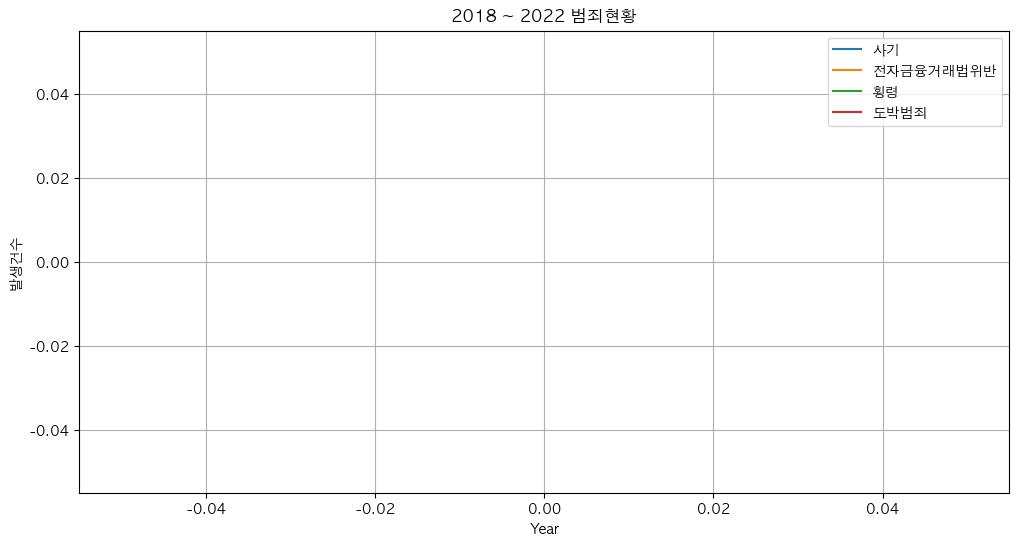

In [79]:
# 데이터 필터링
# X축 = 연도별 / Y축 = 발생건수
df_data = df.loc[(df_rows_type, df_columns), :]

df_data = df_data.T

# 연도 별 데이터를 정수로 변환
for year in df_data.columns:
    df_data[year] = pd.to_numeric(df_data[year], errors='coerce')

plt.figure(figsize=(12, 6))
for crime_type in df_rows_type:
    plt.plot(df_data.index, df_data[crime_type], label=crime_type)

plt.title('2018 ~ 2022 범죄현황')
plt.xlabel('Year')
plt.ylabel('발생건수')
plt.legend()
plt.grid(True)
plt.show()

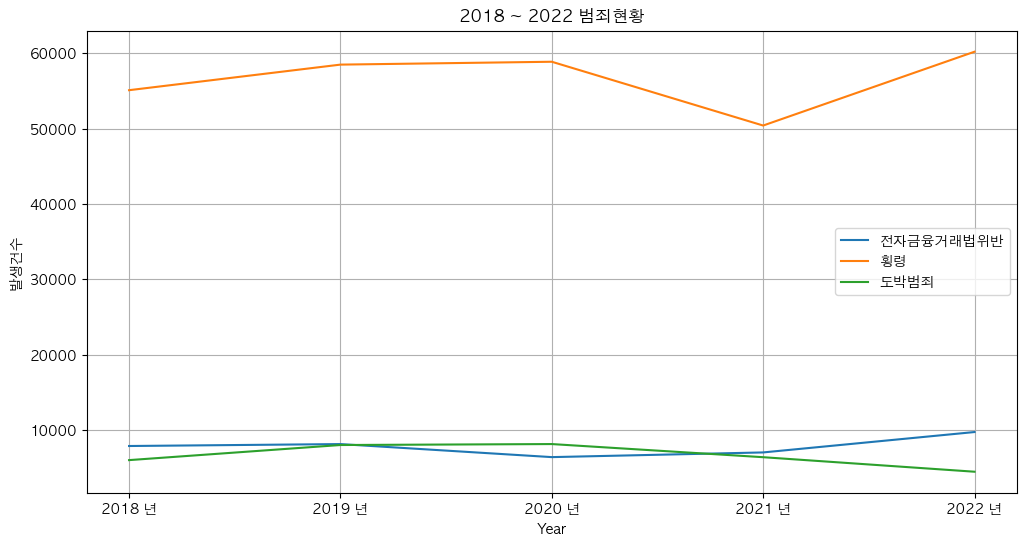

In [21]:
# 사기 항목의 발생건수가 다른 3개의 항목에 비해 많이 높아 사기를 제외한 3개의 항목만 비교하기 위해 df_rows_type에서 사기를 삭제한 후 재그래프화
df_rows_type = ['전자금융거래법위반', '횡령', '도박범죄']

df_data = df.loc[(df_rows_type, df_columns), :]

df_data = df_data.T

# 연도 별 데이터를 정수로 변환
for year in df_data.columns:
    df_data[year] = pd.to_numeric(df_data[year], errors='coerce')

plt.figure(figsize=(12, 6))
for crime_type in df_rows_type:
    plt.plot(df_data.index, df_data[crime_type], label=crime_type)

plt.title('2018 ~ 2022 범죄현황')
plt.xlabel('Year')
plt.ylabel('발생건수')
plt.legend()
plt.grid(True)
plt.show()

Text(0.5, 1.0, '2018 ~ 2022 사기')

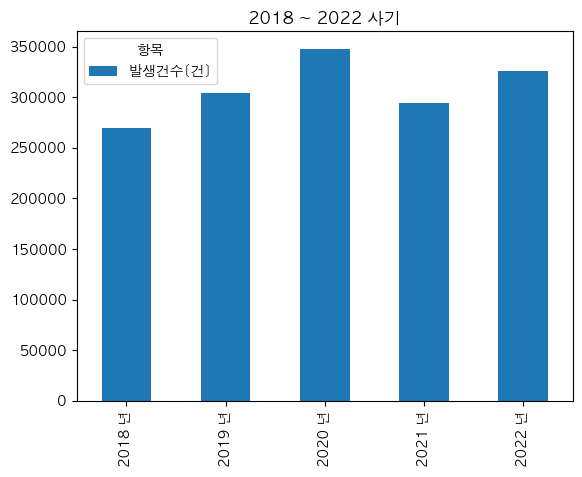

In [230]:
df_data['사기'].plot(kind = 'bar')
plt.title('2018 ~ 2022 사기')

Text(0.5, 1.0, '2018 ~ 2022 전자금융거래법위반')

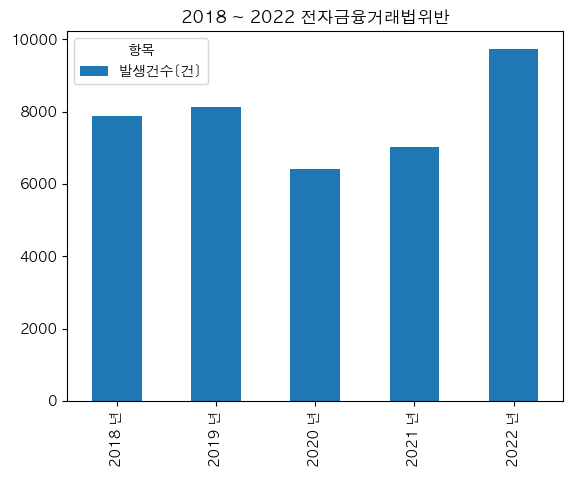

In [231]:
df_data['전자금융거래법위반'].plot(kind = 'bar')
plt.title('2018 ~ 2022 전자금융거래법위반')

Text(0.5, 1.0, '2018 ~ 2022 횡령')

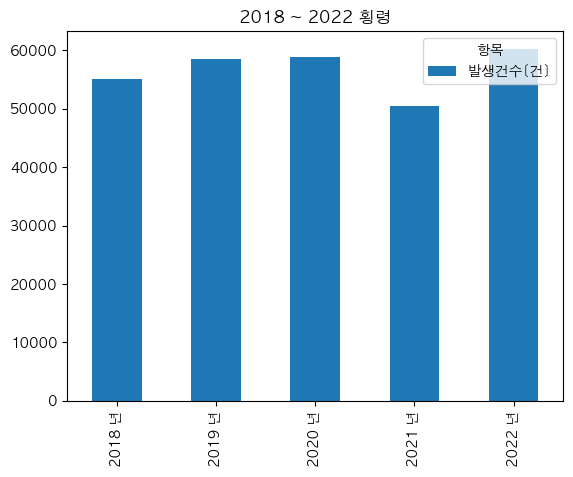

In [232]:
df_data['횡령'].plot(kind = 'bar')
plt.title('2018 ~ 2022 횡령')

Text(0.5, 1.0, '2018 ~ 2022 도박범죄')

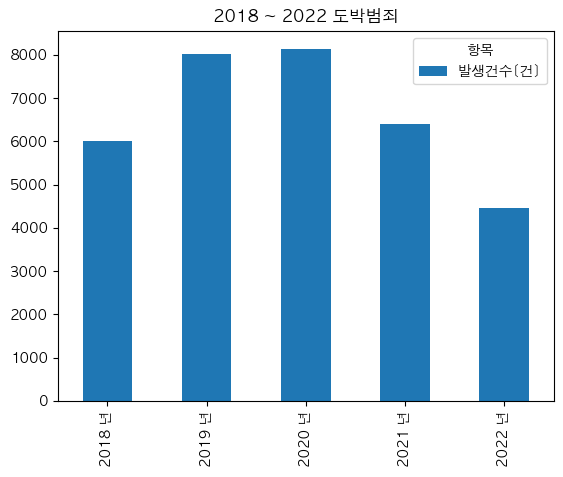

In [233]:
df_data['도박범죄'].plot(kind = 'bar')
plt.title('2018 ~ 2022 도박범죄')